# Assignment - Exercise 7.3 Project Milestone 2
## Week#7
## Date - July-24-2021
## Author - Ganesh Kale

#### _**Project Overview**_

**Introduction** - From the beginning, since first news paper printed, every news that makes into page has had a specific section allotted to it. The newspaper style, news sections, format etc.. have been changed over the time but not the categorization of the news and it still carried over even in to the digital version of newspaper. News articles are not limited to few topics, it covers a wide range of interest from politcs to sports to moveis and so on.
**For long time, this process of categorization news was done manually by people and used to allot news to respective section(category).**
With digitalization of news paper, the news gets updated every moment and allocating to them to appropriate category can be cumbersome task. 

**How to Solve this problem** - To avoid manual news categorization, with help of latest technology, Natural Language Processing and machine leanring, this problem will tackled to classify and predict which category a piece of news will fall into based on the news headline and short description.

**What model will be built for and How it would help** - In order to solve the manual news categorization problem, A machine learning model will be built using supervised machine learning techniques, that would learn from existing news headlines and short description and predict the news category appropriately.
With the help of this model the news categorization can be automated and it would save manual work and help users to read the news of their interest in raight section.

#### _Data Description:_

Context -  This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.

Each news headline has a corresponding category. Categories and corresponding article have different counts. These categories are predefined the time of collecting the data and assigned them accordingly.

#### _import required packages_

In [1]:
import numpy as np
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### _load the data set_

In [2]:
news = pd.read_json("data/News_Category_Dataset_v2.json", lines=True)

#### _display dimension and top 5 records from the data set_

In [3]:
news.shape
news.head()

(200853, 6)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


#### _display data set variable data types and Non-null count_

In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


#### _display descriptive stat summary of categorical variables_

In [5]:
news.describe()

<ipython-input-5-d644a336d14c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  news.describe()


,category,headline,authors,link,short_description,date
count,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://www.guilt...,,2012-12-21 00:00:00
freq,32739,90,36620,2,19712,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


## Exploratory Data Analysis - Data Visualization

#### _display number of news per category_

In [6]:
news.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

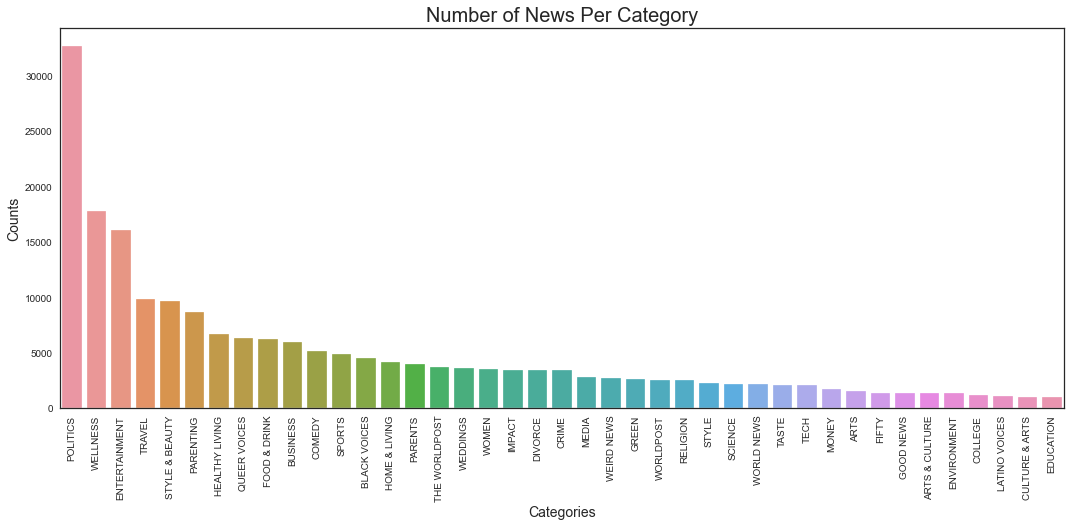

In [7]:
# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
sns.barplot(data=news, x=news.category.value_counts().index,y=news.category.value_counts())
plt.xlabel('Categories',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Category',fontdict = {"fontsize":20})
plt.xticks(rotation=90);

#### _display how many news each year_

In [8]:
# create new column year by extracting year from date column

news['year'] = news['date'].apply(lambda x : x.year)

In [9]:
# display the new column details

news.year.describe()

count    200853.000000
mean       2014.611930
std           1.801049
min        2012.000000
25%        2013.000000
50%        2015.000000
75%        2016.000000
max        2018.000000
Name: year, dtype: float64

In [10]:
# counts of news each year

news.year.value_counts()

2013    34583
2014    32339
2016    32098
2015    32006
2012    31355
2017    29889
2018     8583
Name: year, dtype: int64

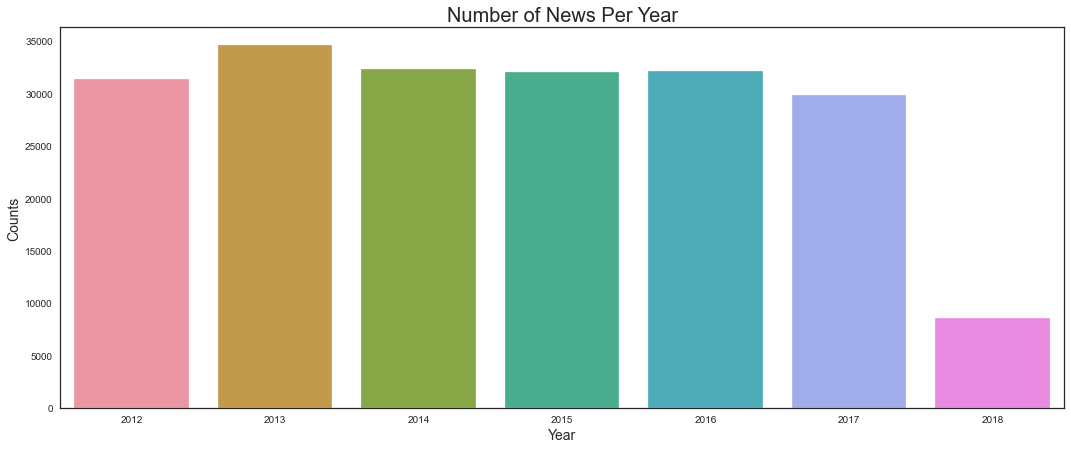

In [11]:
# bar plot to show counts of news each year

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
sns.barplot(data=news, x=news.year.value_counts().index,y=news.year.value_counts())
plt.xlabel('Year',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Year',fontdict = {"fontsize":20});

#### _display distribution of words in headline and short new summary_

In [12]:
# create new column for number of words in headline and short description

news['num_words_head'] = news.headline.apply(lambda x : len(x.split()))
news['num_words_summary'] = news.short_description.apply(lambda x : len(x.split()))

In [13]:
# display the summary of new columns

news[['num_words_head','num_words_summary']].describe()

,num_words_head,num_words_summary
count,200853.000000,200853.000000
mean,9.538563,19.728289
std,3.089320,14.409189
min,0.000000,0.000000
25%,7.000000,10.000000
50%,10.000000,19.000000
75%,12.000000,24.000000
max,44.000000,243.000000


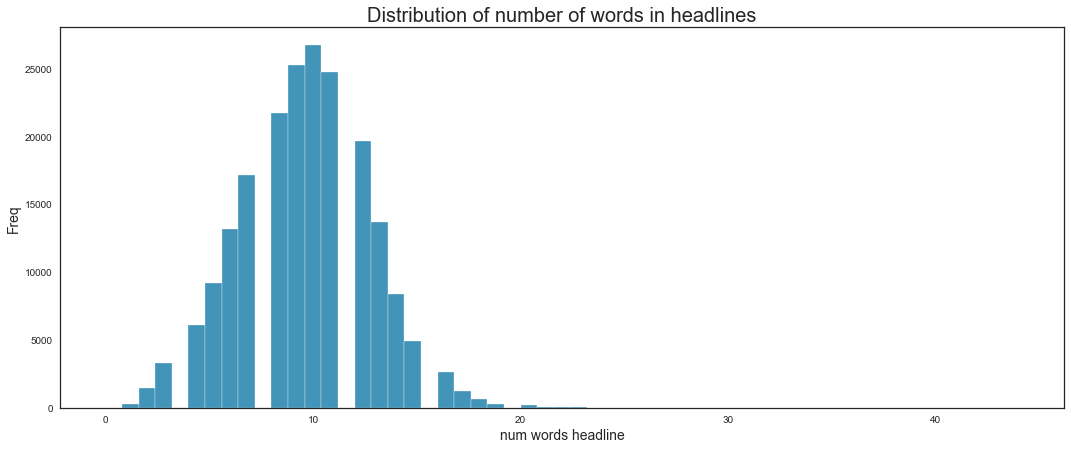

In [14]:
# Distribution of number of words in headline

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot histogram chart for number of words in headlines
sns.histplot(data=news, x='num_words_head', binwidth=0.8, bins=40,)
plt.xlabel('num words headline',fontdict = {"fontsize":14})
plt.ylabel('Freq',fontdict = {"fontsize":14})
plt.title('Distribution of number of words in headlines',fontdict = {"fontsize":20});

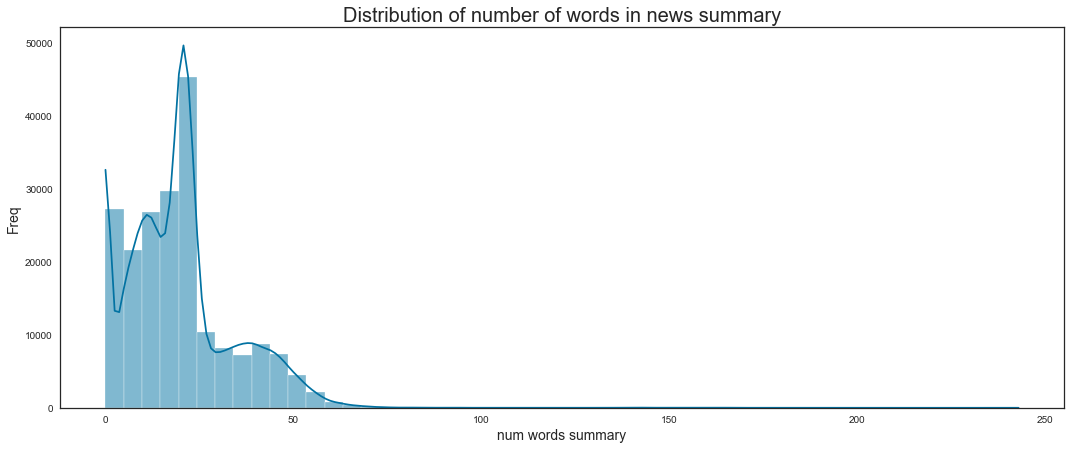

In [15]:
# Distribution of number of words in short description

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot histogram chart for number of words in headlines
sns.histplot(data=news, x='num_words_summary', bins=50, kde=True,)
plt.xlabel('num words summary',fontdict = {"fontsize":14})
plt.ylabel('Freq',fontdict = {"fontsize":14})
plt.title('Distribution of number of words in news summary',fontdict = {"fontsize":20});

## Insights Gained from Graphical Analysis

1. Bar Chart - Number of news per category:
This bar chart shows that the number of news in each category is not same across categories so our class in imbalance and we should use proper techniques to balance the classes/categories.
There are more Politics news than rest of the categories.

2. Bar Chart - Number of news per year:
Based on bar chart we can see that the number of news are same each year except 2018. In 2018 we have jusk around 8.5K news. This helps to understand we may skip this year and drop news in next step.

3. Histogram - Distribution of number of words in headline - 
This distribution shows that it has some outliers with word count more than 20,once that headlines are removed then distribution will be normal distribution.

4. Histogram - Distribution of number of words in short description - 
Based on this hostogram we can see that the distribution is skewed and outliers exist. We need to remove the outliers with word count more than 50.

# **Project Milestone: 2**

#### _Display head of data frame_

In [16]:
news.head()

,category,headline,authors,link,short_description,date,year,num_words_head,num_words_summary
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,2018,14,13
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,2018,14,6
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,2018,10,15
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,2018,11,14
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,2018,13,13


#### _Drop Features that are not required_

The main goal of this project is to predict the appropriate category from news headline and news short description, so these are the two columns we need to train model. Hence we are going to drop rest unwanted features from the data set.

The below list of features will be dropped from the data set -

1. authors - This feature tells who wrote the news but it would help use determine the news category, we we are going to drop this feature.

2. link - this feature shows source of the news and it does not required for news categorization. So it will be dropped.

3. date - this feature explains what date the news was published and this either would not help to solve the problem, hence it will be removed from the data set.

4. year - This feature was created from date, to see the distribution of news and headlines and this will be removed as well.

5. num_words_head and num_words_summary - These features were created to see the words distribution in headlines and summary respectively and will be used to remove outliers from the dataset. Once outliers are removed based on these feature numbers, it will be dropped from data set.

In [17]:
# drop the features - 

drop_features = ['authors','link','date','year']

news_df = news.drop(drop_features,axis=1)

In [18]:
# display head of new dataframe

news_df.shape
news_df.head()

(200853, 5)

,category,headline,short_description,num_words_head,num_words_summary
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,14,13
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,14,6
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,10,15
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,11,14
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",13,13


#### _Remove Outliers from the dataset_

1. Headlines with word count more than 21 words - Based on the histograms plotted above, we can see in the headline column, we have very few headlines with words more than 21, so we are going to remove those headlines.

2. News Short Descriptionwith word count more than 60 words - The histogram above shows the news short description with word count more than 60 words are very few and because of this, we are going to keep news short description with word count less than 61 words.

In [19]:
# remove headlines with more that 21 word count and short description with more than 60 words.

news_df = news_df.loc[(news_df.loc[:,'num_words_head']<=21) & (news_df.loc[:,'num_words_summary']<=60)]

In [20]:
# display shape and top records

news_df.shape
news_df.head()

(199470, 5)

,category,headline,short_description,num_words_head,num_words_summary
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,14,13
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,14,6
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,10,15
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,11,14
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",13,13


#### _Display distribution of word counts in headlines and short description_

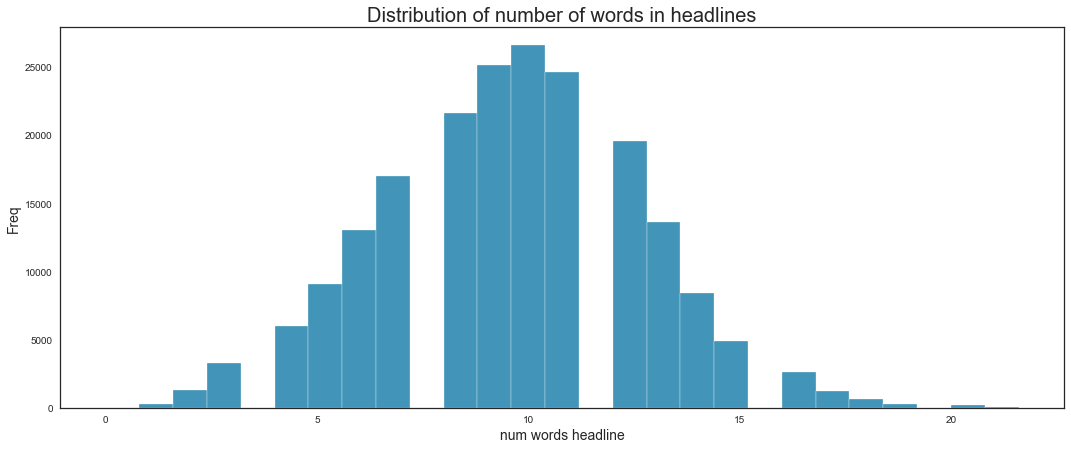

In [21]:
# Distribution of number of words in headline after removing outliers

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot histogram chart for number of words in headlines
sns.histplot(data=news_df, x='num_words_head', binwidth=0.8, bins=40)
plt.xlabel('num words headline',fontdict = {"fontsize":14})
plt.ylabel('Freq',fontdict = {"fontsize":14})
plt.title('Distribution of number of words in headlines',fontdict = {"fontsize":20});

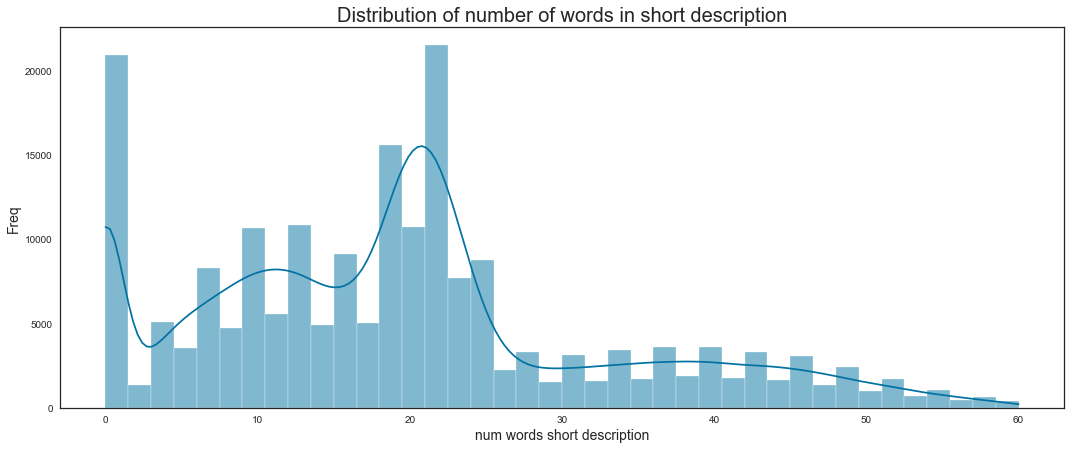

In [22]:
# Distribution of number of words in short description after removing outliers

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot histogram chart for number of words in headlines
sns.histplot(data=news_df, x='num_words_summary', bins=40, kde=True)
plt.xlabel('num words short description',fontdict = {"fontsize":14})
plt.ylabel('Freq',fontdict = {"fontsize":14})
plt.title('Distribution of number of words in short description',fontdict = {"fontsize":20});

#### _Drop num_words_summary and num_words_head columns from the data set_

In [23]:
# drop two columns

news_df = news_df.drop(['num_words_summary','num_words_head'], axis=1)

In [24]:
# display head of dataframe

news_df.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


#### _check if any features have missing info or blank/null_

In [25]:
# display the balnk strings in headline and short description column

len(news_df[news_df['headline']==""])

len(news_df[news_df['short_description']==""])

6

19692

<AxesSubplot:>

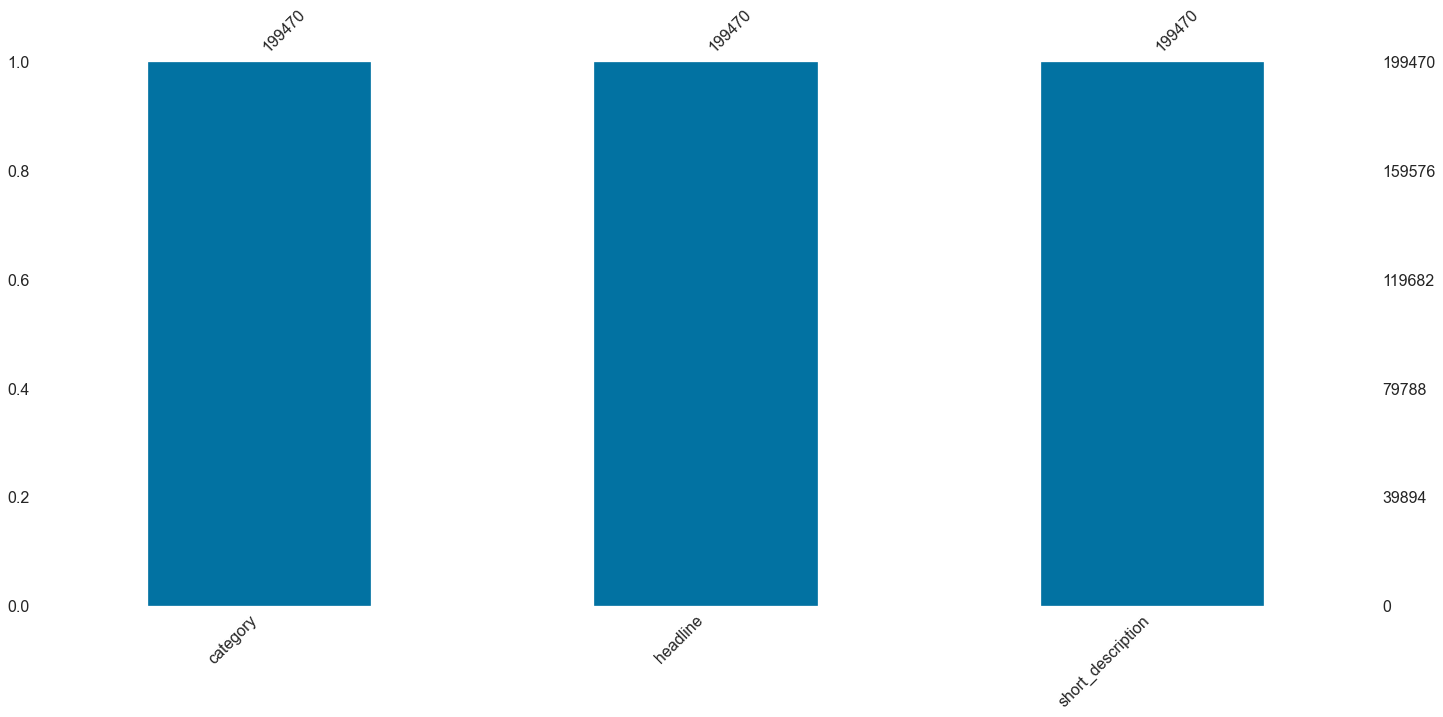

In [26]:
# display bars for each features with non-null values


msno.bar(news_df, color ='b')

Based on above bar charts, it shows that we do not have any missing values or blanks in the features.

#### _Remove duplicates from the data set_

In [27]:
# check if any headlines are duplicates

dup_headlines = news_df.duplicated('headline', keep=False)

In [28]:
# display count of duplicate headlines 

news_df[dup_headlines].shape[0]

2118

In [29]:
# check if any headlines are duplicates

dup_summary = news_df.duplicated('short_description', keep=False)

In [30]:
# display count of duplicate headlines 

news_df[dup_summary].shape[0]

23391

#### _Remove duplicate headlines from the data set_

In [31]:
# remove duplicate headlines and short description

news_df = news_df[~dup_headlines]

news_df = news_df[~dup_summary]

<ipython-input-31-ba8f806c2f23>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  news_df = news_df[~dup_summary]


#### _Create new Column by joining headline and short description columns_

In [32]:
news_df['news_text'] = news_df['headline'] + " " + news_df['short_description']

In [33]:
# displaye shape and head of 

news_df.shape
news_df.head()

(174713, 4)

,category,headline,short_description,news_text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


#### _Balance the Categories_

In [37]:
# check count of news in each category 

news_df.category.value_counts().reset_index()

,index,category
0,POLITICS,28759
1,WELLNESS,17284
2,ENTERTAINMENT,13077
3,TRAVEL,9207
4,PARENTING,8495
5,STYLE & BEAUTY,8305
6,FOOD & DRINK,6162
7,QUEER VOICES,5289
8,HEALTHY LIVING,5042
9,BUSINESS,4990


Based on above distribution, there are imbalanced categories acrross the data set and few categories are redundant and can be clubbed into another category.
For example categories - QUEER VOICES, BLACK VOICES, LATINO VOICES clubbed into one category called 'GROUP VOICES

New feature is created from category column called merged_category and club all the relavant categories and their corresponding news and headlines.

In [38]:
# save all the categories in variable

categories = news_df.category.value_counts().index

#  created function to group categories into new column

def group_category(category_list, name):
    for cat in categories:
        if cat in category_list:
            news_df.loc[news_df['category']==cat,'merged_category']= name


In [39]:
# create new column by running above function

group_category( category_list= ['WELLNESS', 'HEALTHY LIVING','HOME & LIVING','STYLE & BEAUTY' ,'STYLE'] , name =  'LIFESTYLE AND WELLNESS')

group_category( category_list= [ 'PARENTING', 'PARENTS' ,'EDUCATION' ,'COLLEGE'] , name =  'PARENTING AND EDUCATION')

group_category( category_list= ['SPORTS','ENTERTAINMENT' , 'COMEDY','WEIRD NEWS','ARTS'] , name =  'SPORTS AND ENTERTAINMENT')

group_category( category_list= ['TRAVEL', 'ARTS & CULTURE','CULTURE & ARTS','FOOD & DRINK', 'TASTE'] , name =  'TRAVEL-TOURISM & ART-CULTURE')

group_category( category_list= ['WOMEN','QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

group_category( category_list= ['BUSINESS' ,  'MONEY'] , name =  'BUSINESS-MONEY')

group_category( category_list= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name =  'WORLDNEWS')

group_category( category_list= ['ENVIRONMENT' ,'GREEN'] , name =  'ENVIRONMENT')

group_category( category_list= ['TECH', 'SCIENCE'] , name =  'SCIENCE AND TECH')

group_category( category_list= ['FIFTY' , 'IMPACT' ,'GOOD NEWS','CRIME'] , name =  'GENERAL')

group_category( category_list= ['WEDDINGS', 'DIVORCE',  'RELIGION','MEDIA'] , name =  'MISCELLANEOUS')

In [40]:
# display top records after creating new feature and grouping categories

news_df.head()

,category,headline,short_description,news_text,merged_category
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,GENERAL
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,SPORTS AND ENTERTAINMENT
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...,SPORTS AND ENTERTAINMENT
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,SPORTS AND ENTERTAINMENT
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,SPORTS AND ENTERTAINMENT


In [41]:
# check count of news in each category 

news_df.merged_category.value_counts().reset_index()

,index,merged_category
0,LIFESTYLE AND WELLNESS,35989
1,SPORTS AND ENTERTAINMENT,24459
2,TRAVEL-TOURISM & ART-CULTURE,19532
3,PARENTING AND EDUCATION,13642
4,EMPOWERED VOICES,13252
5,MISCELLANEOUS,10932
6,GENERAL,7561
7,WORLDNEWS,6951
8,BUSINESS-MONEY,6688
9,SCIENCE AND TECH,3700


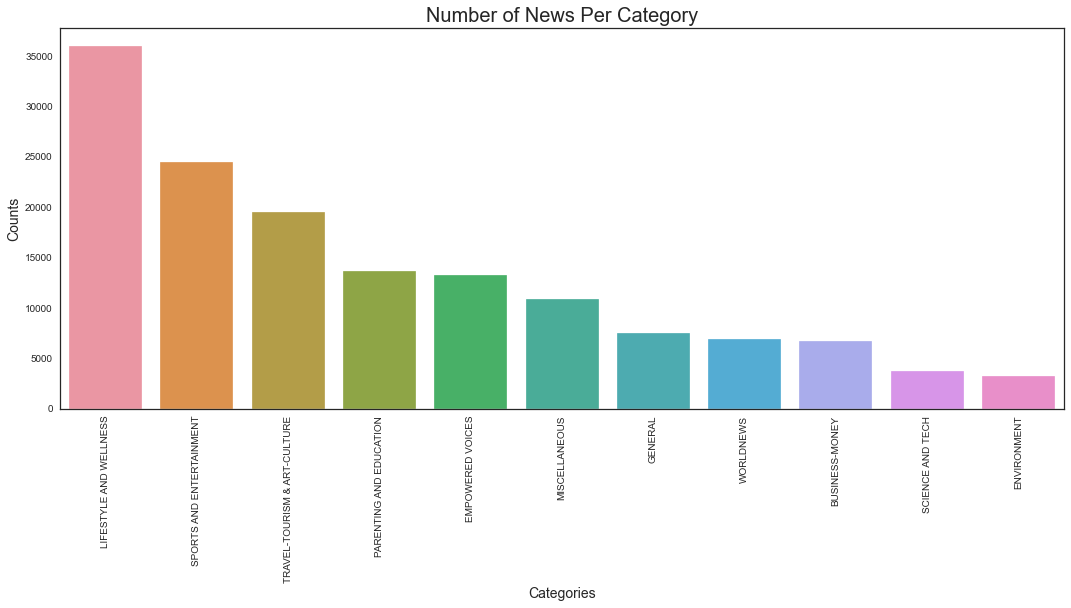

In [42]:
# Display the merged categories for news counts

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
sns.barplot(data=news_df, x=news_df.merged_category.value_counts().index,y=news_df.merged_category.value_counts())
plt.xlabel('Categories',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Category',fontdict = {"fontsize":20})
plt.xticks(rotation=90);

Based on above bar chart we still have imbalnce of categories, in order balance categories, we are going to keep 3200 records from each category.

In [44]:
# new df with same news headlines for each category

final = news_df.groupby(['merged_category'], as_index=False).apply(lambda x: x.sample(3200)).reset_index(drop=True)

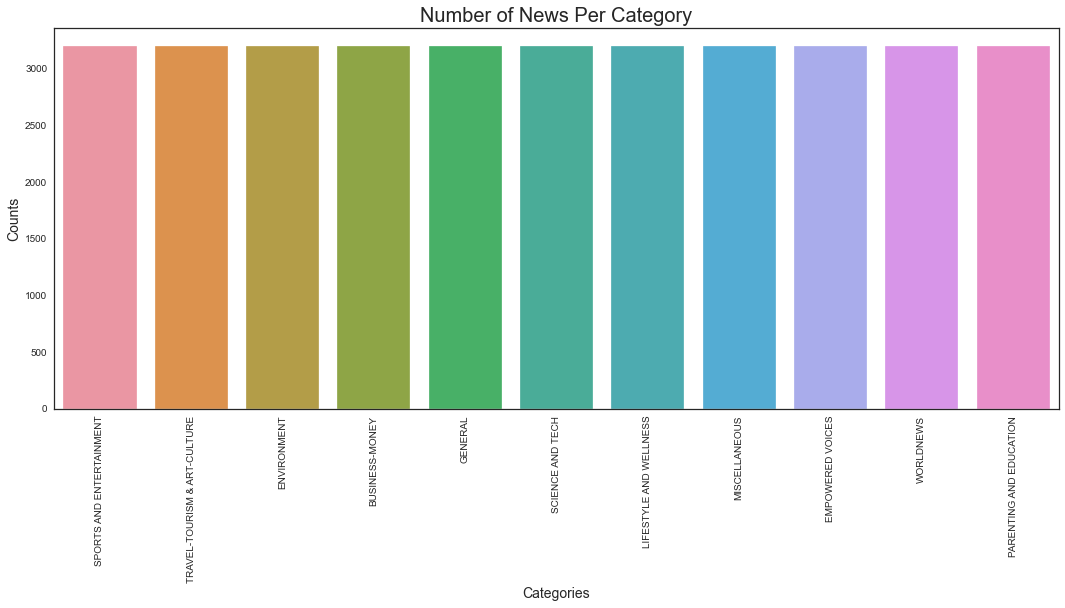

In [46]:
# Display the merged categories for news counts from new dataframe

# set style of the figure and size

sns.set_style('white')
plt.figure(figsize=(18,7))

# plot bar chart for categories and news count
sns.barplot(data=final, x=final.merged_category.value_counts().index,y=final.merged_category.value_counts())
plt.xlabel('Categories',fontdict = {"fontsize":14})
plt.ylabel('Counts',fontdict = {"fontsize":14})
plt.title('Number of News Per Category',fontdict = {"fontsize":20})
plt.xticks(rotation=90);

We have balanced calsses now and each category is having 3.2K news samples

#### _Text Cleaning_

Using scpay to remove stop words and punctuations from the news_text

In [47]:
# import sapcy and load english model

import spacy

nlp = spacy.load('en_core_web_lg')

In [60]:
# clean news_text column by removing punctuations and stop words

final['news_text'] = final.news_text.apply(lambda x : ' '.join([tok.text for tok in nlp(x) if not tok.is_stop and not tok.is_punct]))

In [61]:
# display head and shape

final.shape
final.head()

(35200, 5)

,category,headline,short_description,news_text,merged_category
0,BUSINESS,BMW CEO Harald Krueger Collapses During Event ...,"FRANKFURT, Germany (AP) — BMW CEO Harald Krueg...",BMW CEO Harald Krueger Collapses Event Frankfu...,BUSINESS-MONEY
1,BUSINESS,World's Biggest Green Energy Company Files For...,This is one of the largest bankruptcies involv...,World Biggest Green Energy Company Files Bankr...,BUSINESS-MONEY
2,BUSINESS,Donald Trump's Racism Actually Makes It Imposs...,Because math.,Donald Trump Racism Actually Makes Impossible ...,BUSINESS-MONEY
3,BUSINESS,America Needs More College Graduates In Order ...,"When students arrive at community college, the...",America Needs College Graduates Order Improve ...,BUSINESS-MONEY
4,BUSINESS,"Women in Business Q&A: April Valusek, multi-un...","April Valusek, multi-unit franchisee of Waybac...",Women Business Q&A April Valusek multi unit fr...,BUSINESS-MONEY


Next Steps - 

1. Text Preprocessing - use different methods such - TF-IDF, Bag-Of-Words, Word2Vec Embedding etc
2. Split the data into train and validation
3. Select the model
4. Train the model
5. Evaluate the model

## END